In [5]:
import pandas as pd
import numpy as np
import os

In [6]:
file_name = 'laptops.csv'

In [7]:
if os.path.exists(file_name):
    pass
else:
    !wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

In [8]:
df = pd.read_csv('laptops.csv')
df.head(5)

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [9]:
len(df)

2160

In [10]:
df.describe()

,RAM,Storage,Screen,Final Price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        2160 non-null   object 
 1   Status        2160 non-null   object 
 2   Brand         2160 non-null   object 
 3   Model         2160 non-null   object 
 4   CPU           2160 non-null   object 
 5   RAM           2160 non-null   int64  
 6   Storage       2160 non-null   int64  
 7   Storage type  2118 non-null   object 
 8   GPU           789 non-null    object 
 9   Screen        2156 non-null   float64
 10  Touch         2160 non-null   object 
 11  Final Price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


In [12]:
df.columns

Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage type', 'GPU', 'Screen', 'Touch', 'Final Price'],
      dtype='object')

In [13]:
df.columns = df.columns.str.lower().str.replace(' ','_')
df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

In [14]:
df2 = df[['ram','storage','screen','final_price']]
df2

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


### EDA

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

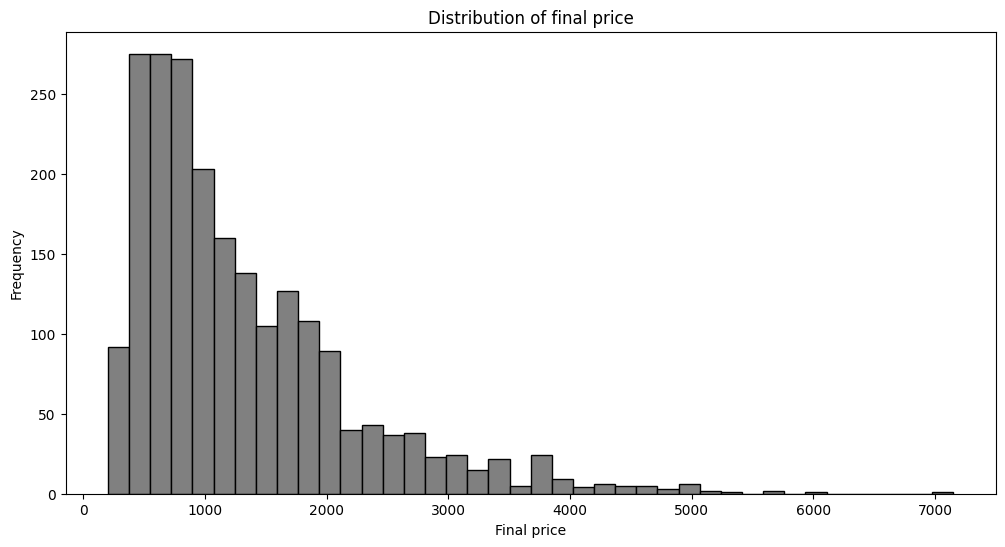

In [16]:
plt.figure(figsize=(12,6))
sns.histplot(df2.final_price, bins=40, color='grey',alpha = 1)
plt.xlabel("Final price")
plt.ylabel("Frequency")
plt.title("Distribution of final price")
plt.show()

In [17]:
#Question 1
df2.columns[df2.isnull().sum() > 0]

Index(['screen'], dtype='object')

In [18]:
#Question2 
df2.ram.median()

16.0

In [19]:
np.random.seed = 42

n  = len(df2)
n_val = int(n * .2)
n_test = int(n * .2)
n_train = n - (n_test + n_val)

#Shuffle dataset

idx = np.arange(n) 
np.random.shuffle(idx)
df_shuffled = df2.iloc[idx]

df_train = df_shuffled.iloc[:n_train]
df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val:].copy()

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [20]:
y_train_orig = df_train.final_price.values
y_val_orig = df_val.final_price.values
y_test_orig = df_test.final_price.values

y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [21]:
df_train

,ram,storage,screen
0,8,256,14.0
1,8,256,15.6
2,16,512,16.1
3,8,256,15.6
4,16,512,14.0
...,...,...,...
1291,8,256,15.6
1292,16,1000,14.0
1293,8,256,14.0
1294,8,256,15.6


In [22]:
#Question 3
df_train.isnull().sum()

ram        0
storage    0
screen     1
dtype: int64

In [23]:
#Fill missing with mean
mean_screen = round(df['screen'].mean(),1)
df_train_mean_fill = df_train.fillna(mean_screen).copy()
df_train_mean_fill.isnull().sum()

ram        0
storage    0
screen     0
dtype: int64

In [24]:
#Fill missing with 0
df_train_zero_fill = df_train.fillna(0).copy()
df_train_zero_fill.isnull().sum()

ram        0
storage    0
screen     0
dtype: int64

In [25]:
#Linear regression without regularization
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [26]:
df_train_mean_fill

,ram,storage,screen
0,8,256,14.0
1,8,256,15.6
2,16,512,16.1
3,8,256,15.6
4,16,512,14.0
...,...,...,...
1291,8,256,15.6
1292,16,1000,14.0
1293,8,256,14.0
1294,8,256,15.6


In [27]:
X_train = df_train_mean_fill
w_0, w = train_linear_regression(X_train,y_train)

In [28]:
w_0

6.792138763752167

In [29]:
w

array([ 0.02742514,  0.00067309, -0.04298579])

In [30]:
y_pred = w_0 + X_train.dot(w)
y_pred

0       6.582049
1       6.513271
2       6.883490
3       6.513271
4       6.973760
          ...   
1291    6.513271
1292    7.302226
1293    6.582049
1294    6.513271
1295    6.685581
Length: 1296, dtype: float64

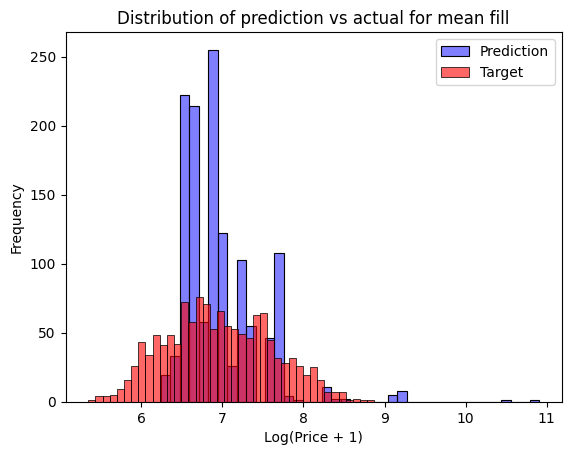

In [31]:
sns.histplot(y_pred,bins=40,label='Prediction',color='Blue',alpha=0.5)
sns.histplot(y_train,bins=40,label='Target',color='Red',alpha=0.6)
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')
plt.title('Distribution of prediction vs actual for mean fill')
plt.legend()
plt.show()

In [32]:
from sklearn.metrics import root_mean_squared_error as rmse

mean_fill_rmse = rmse(y_train,y_pred)
print(f'rmse of mean fill values:{round(mean_fill_rmse,2)}')

rmse of mean fill values:0.44


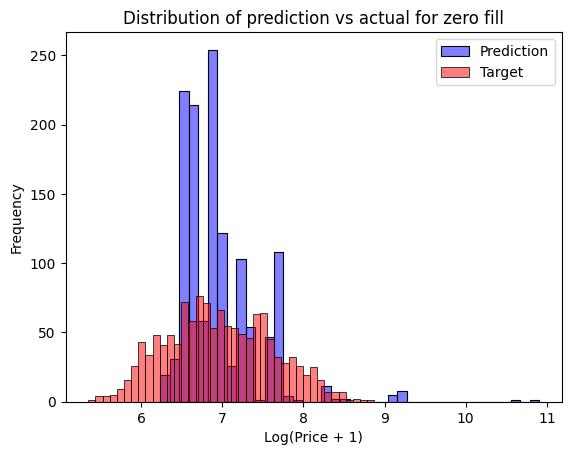

In [33]:
X_train = df_train_zero_fill
w_0, w = train_linear_regression(X_train,y_train)
y_pred = w_0 + X_train.dot(w)
sns.histplot(y_pred,bins=40,label='Prediction',color='Blue',alpha=0.5)
sns.histplot(y_train,bins=40,label='Target',color='Red',alpha=0.5)
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')
plt.title('Distribution of prediction vs actual for zero fill')
plt.legend()
plt.show()

In [34]:
zero_fill_rmse = rmse(y_train,y_pred)
print(f'rmse of zero fill values:{round(zero_fill_rmse,2)}')

rmse of zero fill values:0.44


In [35]:
def prediction_viz(prediction,target,x_label,plot_title, color1 = 'Blue', color2 = 'Red'):
    sns.histplot(prediction,bins=40,label='Prediction',color= color1,alpha=0.5)
    sns.histplot(target,bins=40,label='Target',color=color2,alpha=0.6)
    plt.xlabel(f'{x_label}')
    plt.ylabel('Frequency')
    plt.title(f'{plot_title}')
    plt.legend()
    return plt.show()

In [36]:
df_val.isnull().sum()

ram        0
storage    0
screen     3
dtype: int64

In [37]:
X_val = df_val.fillna(0).copy()
y_pred = w_0 + X_val.dot(w)
print('validation',round(rmse(y_val,y_pred),2))

validation 0.44


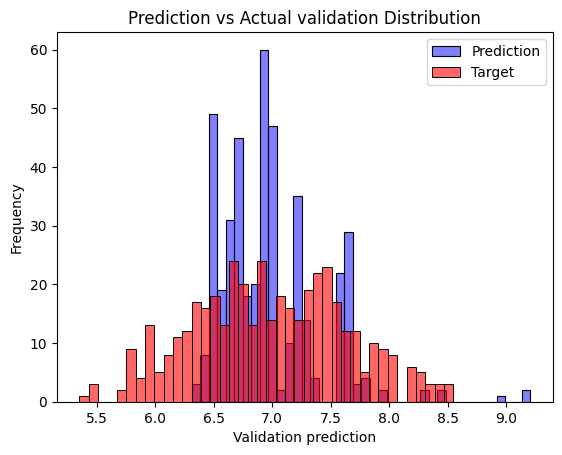

In [38]:
prediction_viz(y_pred,y_val,'Validation prediction', 'Prediction vs Actual validation Distribution')

In [39]:
#Question 4

X_train = df_train_zero_fill

In [40]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [41]:
from tqdm import tqdm,tqdm_gui

  0%|          | 0/7 [00:00<?, ?it/s]

The rmse value is: 0.436592 with the r value being 0


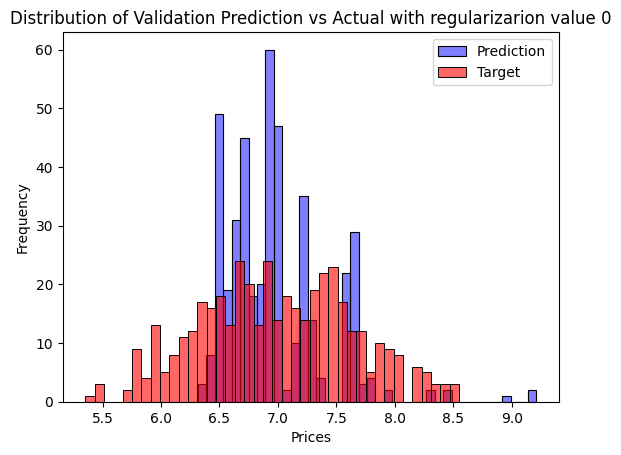

 14%|█▍        | 1/7 [00:00<00:01,  3.36it/s]

The rmse value is: 0.436476 with the r value being 0.01


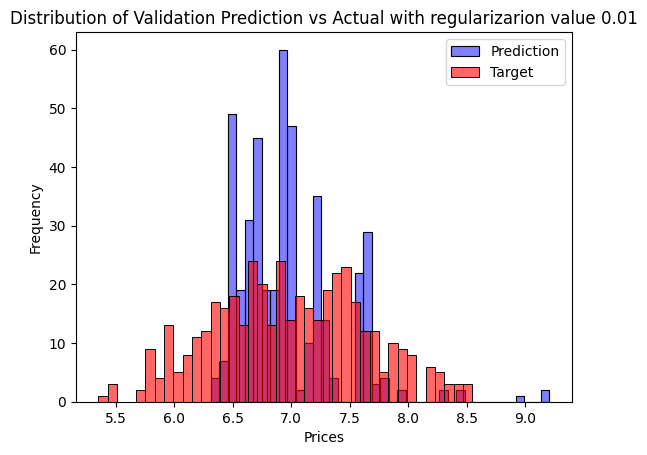

 29%|██▊       | 2/7 [00:00<00:02,  2.34it/s]

The rmse value is: 0.435555 with the r value being 0.1


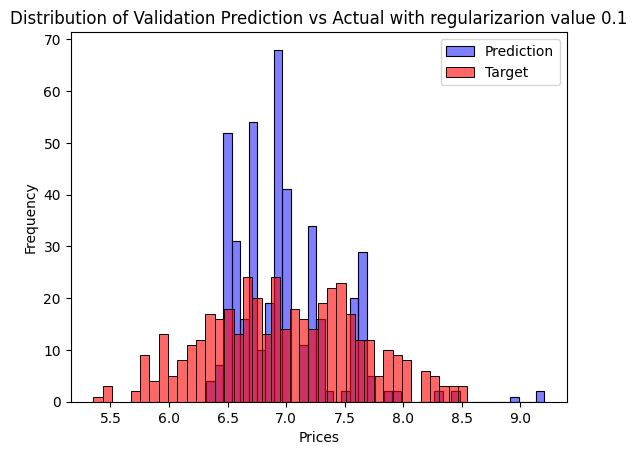

 43%|████▎     | 3/7 [00:01<00:01,  2.22it/s]

The rmse value is: 0.435704 with the r value being 1


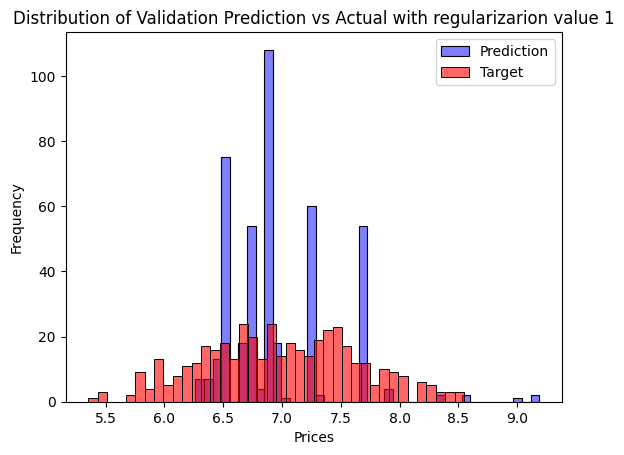

 57%|█████▋    | 4/7 [00:01<00:01,  2.28it/s]

The rmse value is: 0.507987 with the r value being 5


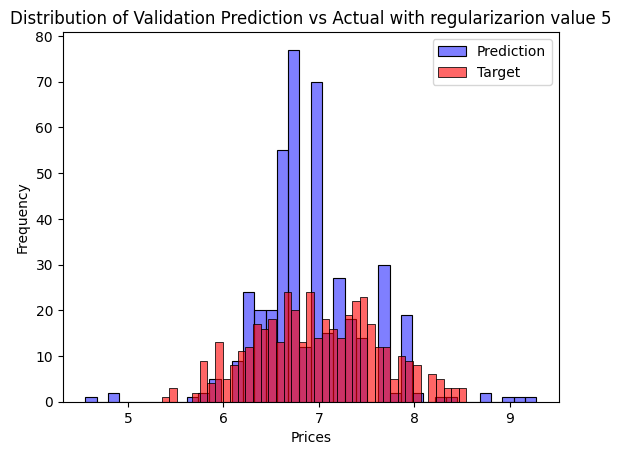

 71%|███████▏  | 5/7 [00:02<00:00,  2.24it/s]

The rmse value is: 0.592339 with the r value being 10


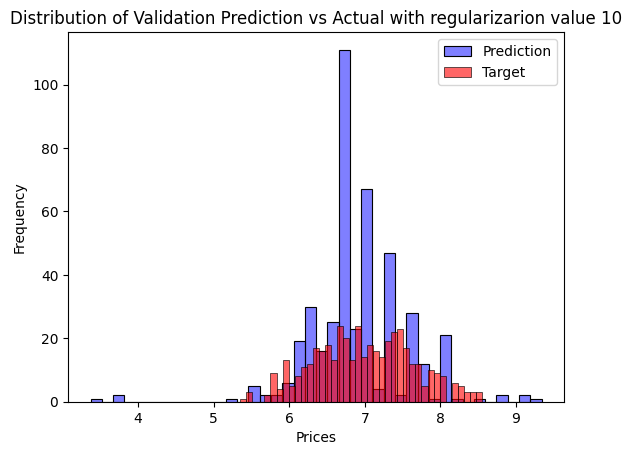

 86%|████████▌ | 6/7 [00:02<00:00,  2.01it/s]

The rmse value is: 0.826227 with the r value being 100


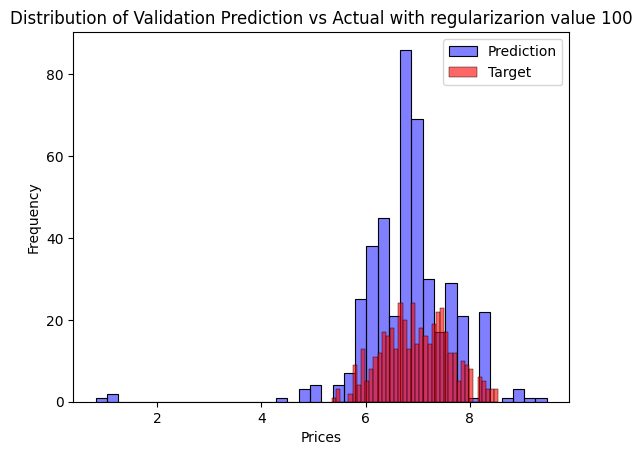

100%|██████████| 7/7 [00:03<00:00,  2.24it/s]


{0: 0.436592,
 0.01: 0.436476,
 0.1: 0.435555,
 1: 0.435704,
 5: 0.507987,
 10: 0.592339,
 100: 0.826227}

In [42]:
#Regularization
reg_dict = {}
for r in tqdm([0, 0.01, 0.1, 1, 5, 10, 100]):
    w_0,w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    reg_dict[r] = round(rmse(y_pred,y_val),6)
    print(f'The rmse value is: {round(rmse(y_pred,y_val),6)} with the r value being {r}' )
    prediction_viz(y_pred,y_val,'Prices', f'Distribution of Validation Prediction vs Actual with regularizarion value {r}')
reg_dict

In [43]:
def split_process(data,seed_num):
    np.random.seed = seed_num
    n  = len(data)
    n_val = int(n * .2)
    n_test = int(n * .2)
    n_train = n - (n_test + n_val)

    #Shuffle dataset

    idx = np.arange(n) 
    np.random.shuffle(idx)
    df_shuffled = data.iloc[idx]

    df_train = df_shuffled.iloc[:n_train]
    df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
    df_test = df_shuffled.iloc[n_train + n_val:].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train_orig = df_train.final_price.values
    y_val_orig = df_val.final_price.values
    y_test_orig = df_test.final_price.values

    y_train = np.log1p(df_train.final_price.values)
    y_val = np.log1p(df_val.final_price.values)
    y_test = np.log1p(df_test.final_price.values)

    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']


    return (df_train,df_val,df_test),(y_train,y_val,y_test)

  0%|          | 0/10 [00:00<?, ?it/s]

For seed value:0, the rmse score is 0.4412904461755761


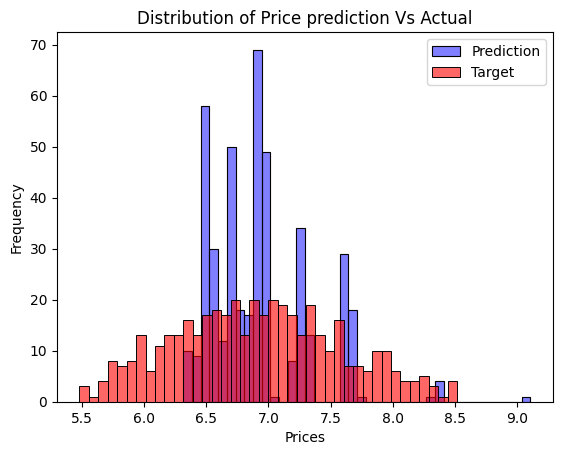

 10%|█         | 1/10 [00:00<00:04,  1.90it/s]


For seed value:1, the rmse score is 0.4577343660890562


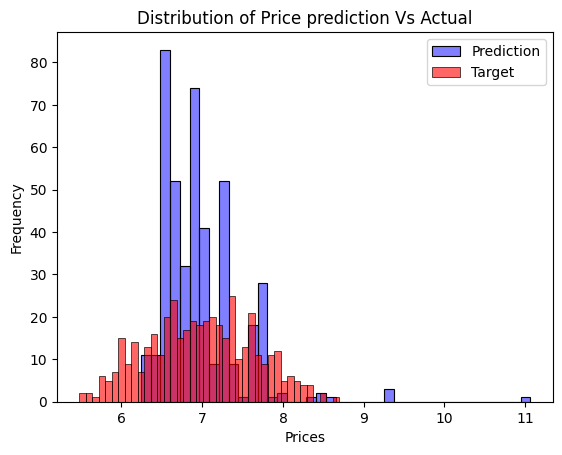

 20%|██        | 2/10 [00:00<00:03,  2.38it/s]


For seed value:2, the rmse score is 0.4398721228581103


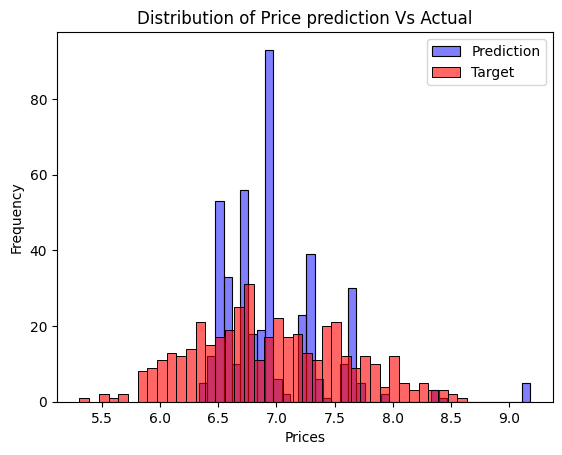

 30%|███       | 3/10 [00:01<00:02,  2.56it/s]


For seed value:3, the rmse score is 0.44692937704889246


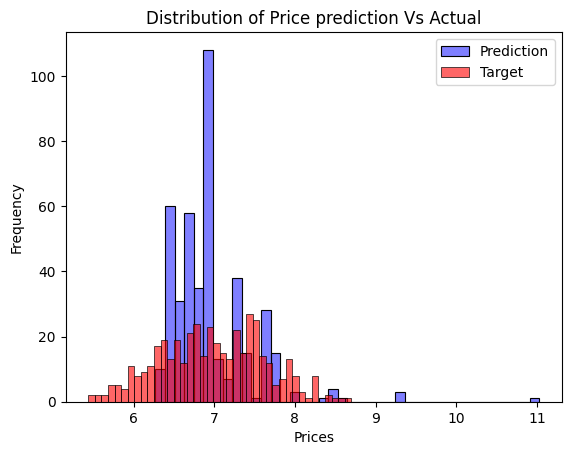

 40%|████      | 4/10 [00:01<00:02,  2.71it/s]


For seed value:4, the rmse score is 0.4358072573247778


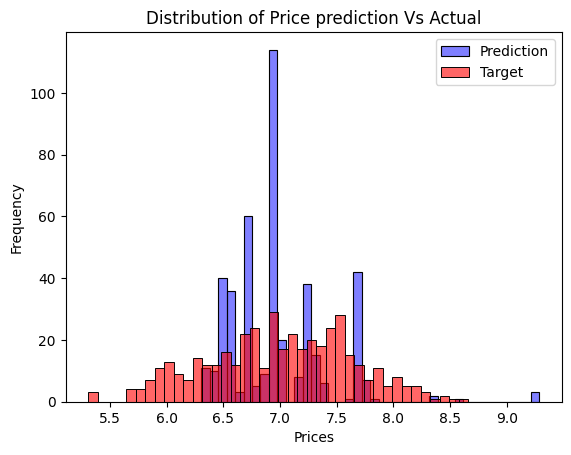

 50%|█████     | 5/10 [00:01<00:01,  2.64it/s]


For seed value:5, the rmse score is 0.4516296540597316


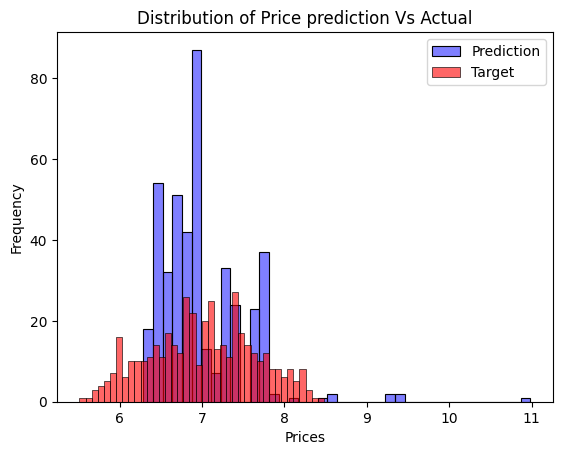

 60%|██████    | 6/10 [00:02<00:01,  2.70it/s]


For seed value:6, the rmse score is 0.4237137346372975


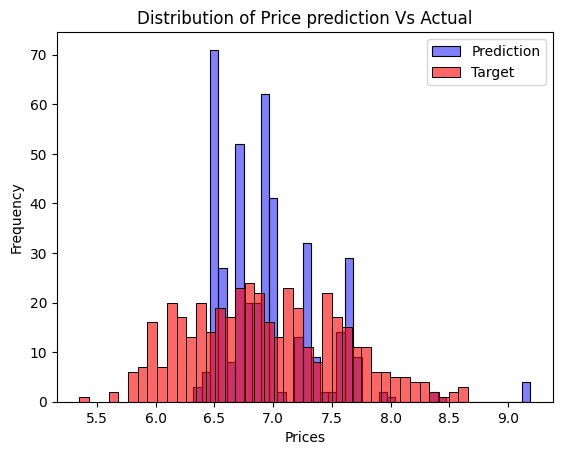

 70%|███████   | 7/10 [00:02<00:01,  2.75it/s]


For seed value:7, the rmse score is 0.4491957299488574


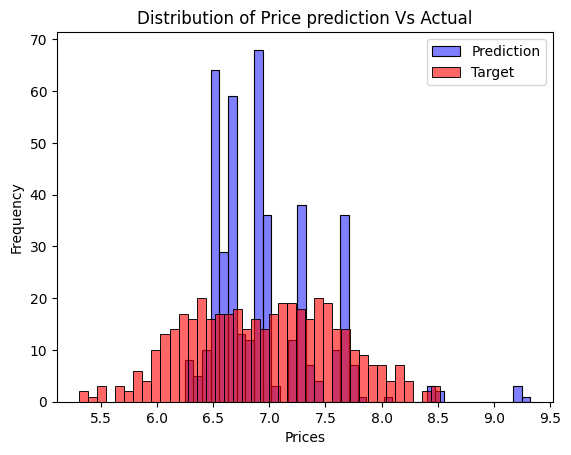

 80%|████████  | 8/10 [00:03<00:00,  2.80it/s]


For seed value:8, the rmse score is 0.4230833877800404


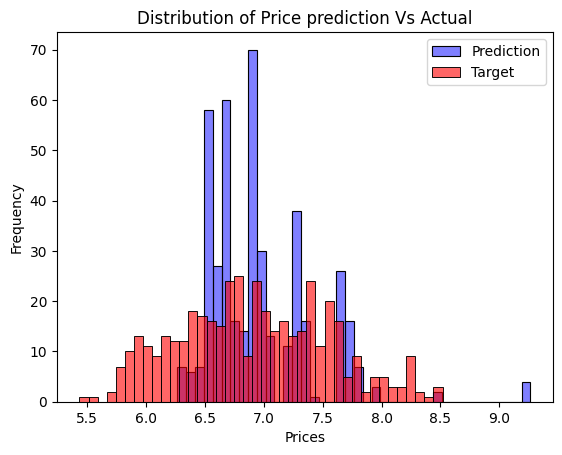

 90%|█████████ | 9/10 [00:03<00:00,  2.77it/s]


For seed value:9, the rmse score is 0.44390192256408373


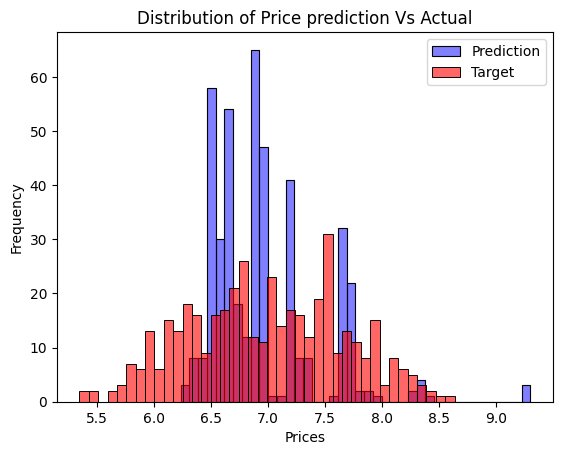

100%|██████████| 10/10 [00:03<00:00,  2.51it/s]


The std value is :0.011


In [44]:
#Question 5
seed_value = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_dict = {}
train_rmse = {}

for num in tqdm(seed_value):
    X_features,y_targets = split_process(df2,num)
    df_train_zero_fill = X_features[0].fillna(0).copy()

    X_train = df_train_zero_fill
    w_0, w = train_linear_regression(X_train,y_targets[0])
    y_pred = w_0 + X_train.dot(w)
    train_rmse[num] = rmse(y_targets[0], y_pred)

    X_val = X_features[1].fillna(0).copy()
    y_pred = w_0 + X_val.dot(w)
    eval_rmse = rmse(y_targets[1], y_pred)
    
    rmse_dict[num] = eval_rmse
    print(f'For seed value:{num}, the rmse score is {eval_rmse}')
    prediction_viz(y_pred,y_targets[1],'Prices', 'Distribution of Price prediction Vs Actual')
    print('')


std = round(np.std(list(rmse_dict.values())),3)
print(f'The std value is :{std}')

    



In [45]:
np.std(list(rmse_dict.values()))

0.010728098249400584

In [46]:
np.std(list(train_rmse.values()))

0.005682060213859027

In [47]:
rmse_dict

{0: 0.4412904461755761,
 1: 0.4577343660890562,
 2: 0.4398721228581103,
 3: 0.44692937704889246,
 4: 0.4358072573247778,
 5: 0.4516296540597316,
 6: 0.4237137346372975,
 7: 0.4491957299488574,
 8: 0.4230833877800404,
 9: 0.44390192256408373}

In [48]:
df2.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [49]:
#Question 6
new_df = df2.fillna(0).copy()
np.random.seed = 9
n  = len(new_df)
n_test = int(n * .2)
n_train = n - n_test

#Shuffle dataset

idx = np.arange(n) 
np.random.shuffle(idx)
df_shuffled = new_df.iloc[idx]

df_train = df_shuffled.iloc[:n_train]
    # df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train:].copy()

df_train = df_train.reset_index(drop=True)
# df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.final_price.values)
# y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

del df_train['final_price']
del df_test['final_price']

In [50]:
X_test = df_test.copy()
w_0,w = train_linear_regression_reg(df_train,y_train,0.001)
y_pred = w_0 + X_test.dot(w)
test_rmse = rmse(y_test,y_pred)
print(test_rmse)

0.43701509656562226


In [3]:
path = r"C:\Users\hk3to\OneDrive\Desktop\PAINT CAT CHART\Monthly report\Al-amin Sekinat June Report.xlsx"

In [79]:
pd.read_excel??

Signature:
pd.read_excel(
    io,
    sheet_name: 'str | int | list[IntStrT] | None' = 0,
    *,
    header: 'int | Sequence[int] | None' = 0,
    names: 'list[str] | None' = None,
    index_col: 'int | Sequence[int] | None' = None,
    usecols: 'int | str | Sequence[int] | Sequence[str] | Callable[[str], bool] | None' = None,
    squeeze: 'bool | None' = None,
    dtype: 'DtypeArg | None' = None,
    engine: "Literal['xlrd', 'openpyxl', 'odf', 'pyxlsb'] | None" = None,
    converters: 'dict[str, Callable] | dict[int, Callable] | None' = None,
    true_values: 'Iterable[Hashable] | None' = None,
    false_values: 'Iterable[Hashable] | None' = None,
    skiprows: 'Sequence[int] | int | Callable[[int], object] | None' = None,
    nrows: 'int | None' = None,
    na_values=None,
    keep_default_na: 'bool' = True,
    na_filter: 'bool' = True,
    verbose: 'bool' = False,
    parse_dates: 'list | dict | bool' = False,
    date_parser: 'Callable | None' = None,
    thousands: 'str | None' =

In [2]:
import openpyxl

In [51]:
pd.read_excel(path)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,NaN,NaN,NaN,NaN,NaN,DAILY SALES RECORD - DULUX,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,2024-06-01 00:00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,S/N,PRODUCT NAME,PACK SIZE (LITERS),QUANTITY,NaN,2024-06-01 00:00:00,2024-06-02 00:00:00,2024-06-03 00:00:00,2024-06-04 00:00:00,2024-06-05 00:00:00,...,2024-06-21 00:00:00,2024-06-22 00:00:00,2024-06-23 00:00:00,2024-06-24 00:00:00,2024-06-25 00:00:00,2024-06-26 00:00:00,2024-06-27 00:00:00,2024-06-28 00:00:00,2024-06-29 00:00:00,2024-06-30 00:00:00
3,1,Silk Emulsion (White),20,50,Qty Sold,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,NaN,NaN,NaN,Unit Price,133645.17,133645.17,133645.17,133645.17,133645.17,...,133645.17,133645.17,133645.17,133645.17,133645.17,133645.17,133645.17,133645.17,133645.17,133645.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,NaN,NaN,NaN,DISCOUNT AMOUNT,NaN,68919.9385,1000,0,0,0,...,0,0,0,0,20525.218,0,0,0,0,0
165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,NaN,NaN,NaN,DAILY TOTAL,NaN,1309478.8315,138355.93,0,0,0,...,0,0,0,0,389979.142,0,0,0,0,0
167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
from openpyxl import Workbook

In [54]:
wb = Workbook()
ws = wb.active

In [55]:
ws

<Worksheet "Sheet">

In [74]:
openpyxl.load_workbook(path).active

<Worksheet "June Record">

In [58]:
report = openpyxl.load_workbook(path).active

In [73]:
report

<Worksheet "June Record">

In [77]:
print(report.cell(row=1,column=.value))

TypeError: Worksheet.cell() missing 1 required positional argument: 'column'

In [75]:
#Total cell numbers
print(report.max_row)

1016


In [82]:
max_row = 173
for row in range(1, max_row + 1):
    for column in range(1, report.max_column):
        val = report.cell(row=row,column=column).value
        if val != None:
            print(val)

DAILY SALES RECORD - DULUX
2024-06-01 00:00:00
S/N
PRODUCT NAME
PACK SIZE (LITERS)
QUANTITY
2024-06-01 00:00:00
2024-06-02 00:00:00
2024-06-03 00:00:00
2024-06-04 00:00:00
2024-06-05 00:00:00
2024-06-06 00:00:00
2024-06-07 00:00:00
2024-06-08 00:00:00
2024-06-09 00:00:00
2024-06-10 00:00:00
2024-06-11 00:00:00
2024-06-12 00:00:00
2024-06-13 00:00:00
2024-06-14 00:00:00
2024-06-15 00:00:00
2024-06-16 00:00:00
2024-06-17 00:00:00
2024-06-18 00:00:00
2024-06-19 00:00:00
2024-06-20 00:00:00
2024-06-21 00:00:00
2024-06-22 00:00:00
2024-06-23 00:00:00
2024-06-24 00:00:00
2024-06-25 00:00:00
2024-06-26 00:00:00
2024-06-27 00:00:00
2024-06-28 00:00:00
2024-06-29 00:00:00
2024-06-30 00:00:00
1
Silk Emulsion (White)
20
50
Qty Sold
3
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Unit Price
133645.17
=F6
=G6
=H6
=I6
=J6
=K6
=L6
=M6
=N6
=O6
=P6
=Q6
=R6
=S6
=T6
=U6
=V6
=W6
=X6
=Y6
=Z6
=AA6
=AB6
=AC6
=AD6
=AE6
=AF6
=AG6
=AH6
Sales ( Amount, N )
=F5*F6
=G5*G6
=H5*H6
=I5*I6
=J5*J6
=K5*K6
=L

In [84]:
def next_greater_multiple(x, n):
    return ((x // n) + 1) * n

# Example
x = 14
n = 5
print(next_greater_multiple(x, n))  # Output: 15


15


In [85]:
def next_greater_multiple(number, multiple):
    if multiple == 0:
        raise ValueError("The multpile must be a non-zero integer")
    remainder = number%multiple
    if remainder == 0:
        return number + multiple
    else:
        return number + (multiple - remainder)

In [92]:
next_greater_multiple(-5,3)

-3

In [94]:
def count_unique_even_index_digits(text):
    seen = set()
    count = 0

    # Use enumerate to get both index and character
    for i, char in enumerate(text):
        # Check if character is a digit, is unique and at an even index 
       if char.isdigit() and char not in seen and i % 2 == 0:
            count += 1
            seen.add(char)

    return count

# Correct the function name in the print statement
print(count_unique_even_index_digits("1214450394561984015"))

6
